<a href="https://colab.research.google.com/github/N4bilFikri/Data-Mining/blob/main/Tugas_5_Evaluation_PDAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Perbandingan Tingkat Ekonomi Antara Anak-anak Miskin & Kaya di Negara-negara Berkembang*#

#**Import Library dan Resource yang akan digunakan**

**Core Library**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Library untuk Splitting Data**

In [58]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [59]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score
from sklearn import metrics

#**Inisiasi Variabel untuk menyimpan Dataframe**

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/N4bilFikri/Data-Mining/main/Data%20Cleaned.csv')

In [62]:
df.head()

,total,poorest_20perc,richest_20perc,diff,country_encoded,country_Albania,country_Algeria,country_Argentina,country_Bangladesh,country_Belize,...,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav Republic of Macedonia,country_Trinidad and Tobago,country_Tunisia,country_Turkmenistan,country_Uzbekistan,country_Viet Nam,country_Yemen
0,5,1,24,24,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,1,23,22,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1,24,23,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,1,34,33,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,2,28,26,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**Modelling Predict**

#####*Dari dataset ini, terlihat bahwa data tersebut memiliki beberapa variabel independen (misalnya, country_encoded) dan satu variabel dependen (total). Berdasarkan informasi ini, dapat diasumsikan bahwa tujuan analisis adalah untuk melakukan prediksi terhadap nilai total berdasarkan variabel-variabel independen yang ada.*

#####*Dalam konteks ini, algoritma pemodelan yang cocok adalah algoritma regresi/algoritma prediktif. Tujuan dari algoritma regresi adalah untuk membangun model matematis yang dapat memprediksi nilai-nilai continuos atau kategorikal berdasarkan variabel independen.*

#####*Dengan demikian, algoritma yang cocok untuk database ini adalah algoritma prediktif.*

###**Pre-Processing**

#####**Split Data**

In [63]:
x = df.drop('total', axis=1)
y = df['total']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#####**Normalisasi Data**

In [64]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

###**Build and Train Model**

#####**Gaussian Naive Bayes**

In [65]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

#####**K-Nearest Neighbor**

In [66]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

#####**Decision Tree**

In [67]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

###**Begins and Compare Predict**

In [68]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

In [69]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [70]:
combined_data.head()

,poorest_20perc,richest_20perc,diff,country_encoded,country_Albania,country_Algeria,country_Argentina,country_Bangladesh,country_Belize,country_Bhutan,...,country_Trinidad and Tobago,country_Tunisia,country_Turkmenistan,country_Uzbekistan,country_Viet Nam,country_Yemen,total,gnb_prediction,knn_prediction,dtc_prediction
0,13,57,44,20,0,0,0,0,0,0,...,0,0,0,0,0,0,33,11,21,21
1,7,59,52,23,0,0,0,0,0,0,...,0,0,0,0,0,0,26,11,21,21
2,2,28,26,8,0,0,0,0,0,0,...,0,0,0,0,0,0,10,11,6,6
3,34,73,39,14,0,0,0,0,0,0,...,0,0,0,0,0,0,55,11,51,37
4,48,87,39,21,0,0,0,0,0,0,...,0,0,0,0,0,0,73,11,51,37


#**Tensorflow Classification (Extras)**

In [71]:
import tensorflow as tf
from tensorflow import keras

In [72]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='softmax')
])

In [73]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
y_train

12    18
32    61
9     25
19    27
0      5
31    56
5      9
11    26
1      6
27    43
21    32
2      6
36    81
34    72
3     11
33    58
23    41
30    51
10    17
22    52
18    37
20    35
7     11
14    21
28    68
Name: total, dtype: int64

In [75]:
model.fit(x_train_norm, y_train, epochs=10, batch_size=32, validation_data=(x_test_norm, y_test))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: -4.8784 - accuracy: 0.0000e+00 - val_loss: -6.4102 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 56ms/step - loss: -6.1492 - accuracy: 0.0000e+00 - val_loss: -7.4224 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 59ms/step - loss: -7.4257 - accuracy: 0.0000e+00 - val_loss: -8.4785 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 62ms/step - loss: -8.6974 - accuracy: 0.0000e+00 - val_loss: -9.5698 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 58ms/step - loss: -9.9617 - accuracy: 0.0000e+00 - val_loss: -10.6872 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 62ms/step - loss: -11.2325 - accuracy: 0.0000e+00 - val_loss: -11.8378 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 51ms/step - loss: -12.5178 - accuracy: 0.0000e+00 - 

In [76]:
tf_pred_prob = model.predict(x_test_norm)

tf_pred = np.argmax(tf_pred_prob, axis=1)

tf_col = pd.DataFrame(tf_pred, columns=["tf_prediction"])

final_data = pd.concat([combined_data, tf_col], axis=1)

1/1 [==============================] - 0s 62ms/step


In [77]:
final_data

,poorest_20perc,richest_20perc,diff,country_encoded,country_Albania,country_Algeria,country_Argentina,country_Bangladesh,country_Belize,country_Bhutan,...,country_Tunisia,country_Turkmenistan,country_Uzbekistan,country_Viet Nam,country_Yemen,total,gnb_prediction,knn_prediction,dtc_prediction,tf_prediction
0,13,57,44,20,0,0,0,0,0,0,...,0,0,0,0,0,33,11,21,21,0
1,7,59,52,23,0,0,0,0,0,0,...,0,0,0,0,0,26,11,21,21,0
2,2,28,26,8,0,0,0,0,0,0,...,0,0,0,0,0,10,11,6,6,0
3,34,73,39,14,0,0,0,0,0,0,...,0,0,0,0,0,55,11,51,37,0
4,48,87,39,21,0,0,0,0,0,0,...,0,0,0,0,0,73,11,51,37,0
5,25,76,51,12,0,0,0,0,0,0,...,0,0,0,0,0,47,11,35,37,0
6,3,40,37,32,0,0,0,0,0,0,...,1,0,0,0,0,18,11,5,5,0
7,30,66,36,33,0,0,0,0,0,0,...,0,1,0,0,0,48,11,21,58,0
8,23,73,49,4,0,0,0,0,1,0,...,0,0,0,0,0,44,11,32,61,0
9,12,53,41,27,0,0,0,0,0,0,...,0,0,0,0,0,30,11,21,21,0


#**Evaluation**


##**Evaluate Results**

###**Regresi**

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X_train, X_test, y_train_r, y_test_r = train_test_split(data, target, test_size=0.2, random_state=42)

model_lr = LinearRegression()

model_lr.fit(X_train, y_train_r)

y_pred_lr = model_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test_r, y_pred_lr)
mse_lr = mean_squared_error(y_test_r, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = mean_absolute_percentage_error(y_test_r, y_pred_lr)

model_dt = DecisionTreeRegressor()

model_dt.fit(X_train, y_train_r)

y_pred_dt = model_dt.predict(X_test)

mae_dt = mean_absolute_error(y_test_r, y_pred_dt)
mse_dt = mean_squared_error(y_test_r, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mape_dt = mean_absolute_percentage_error(y_test_r, y_pred_dt)

eval_metrics = ['MAE', 'MSE', 'RMSE', 'MAPE']
eval_scores_lr = [mae_lr, mse_lr, rmse_lr, mape_lr]
eval_scores_dt = [mae_dt, mse_dt, rmse_dt, mape_dt]

df_eval = pd.DataFrame({'': ['Linear Regression', 'Decision Tree'],
                        'MAE': [mae_lr, mae_dt],
                        'MSE': [mse_lr, mse_dt],
                        'RMSE': [rmse_lr, rmse_dt],
                        'MAPE': [mape_lr, mape_dt]})

df_eval = df_eval.set_index('')

display(df_eval)

,MAE,MSE,RMSE,MAPE
,,,,
Linear Regression,3.189092,24.291119,4.928602,0.168664
Decision Tree,2.351961,9.986961,3.160215,0.124739


##**Review Process**

###**Feature Selection**

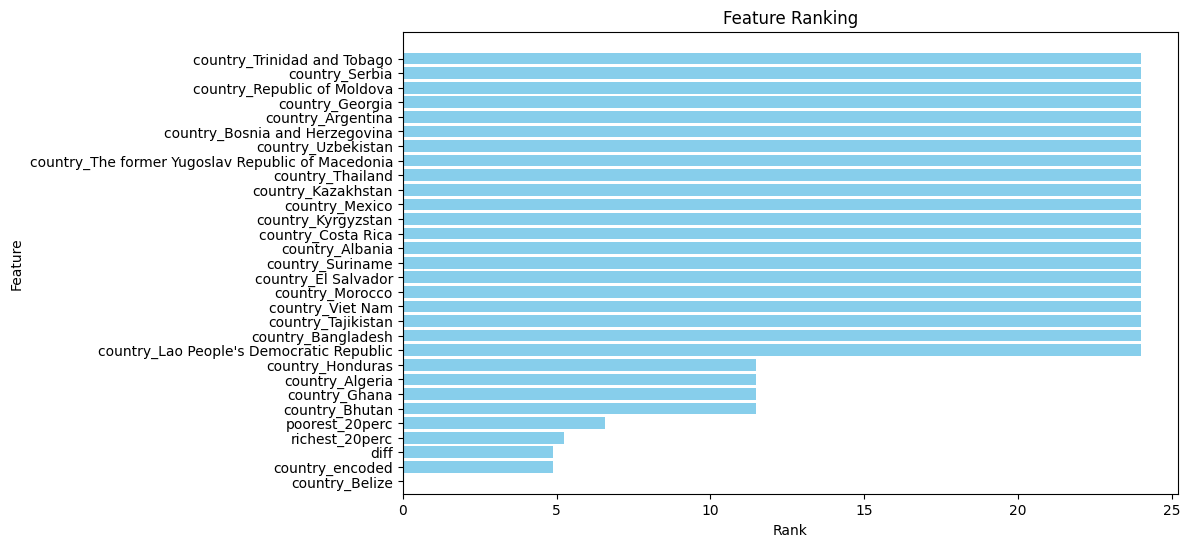

In [79]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=chi2, k=10)

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

###**Tuning Hyperparameter**

In [122]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/N4bilFikri/Data-Mining/main/Data%20Cleaned.csv')
# Split features and target variable
X = df.drop(columns=["diff"])
y = df["diff"]

# Define the parameter grid
param_grid = {
    'n_estimators': sp_randint(100, 1000),
    'max_depth': sp_randint(1, 10),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 10),
}

# Create a random forest regressor
rf = RandomForestRegressor(random_state=42)

# Perform random search cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 503}
Best Score: -1.8506452292984477
